In [ ]:
!pip install awscli
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.1.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.8 MB/s eta 0:00:00


In [ ]:
import boto3
from google.colab import userdata
import pandas as pd

session = boto3.session.Session()
s3 = session.client(
    service_name='s3',
    endpoint_url='https://storage.yandexcloud.net',
    aws_access_key_id=userdata.get('aws_access_key_id'),
    aws_secret_access_key=userdata.get('aws_secret_access_key')
)

# Получить список объектов в бакете
#print(s3.list_objects(Bucket='guard-01')['Contents'])


# Получить объект
get_object_response = s3.get_object(Bucket='guard-01',Key='variables/PULSATING/661428169783.csv')
var = pd.read_csv(get_object_response['Body'], skiprows=1)
var

,asas_sn_id,jd,flux,flux_err,mag,mag_err,limit,fwhm,image_id,camera,quality,phot_filter
0,661428169783,2.457458e+06,7.979737,0.068351,14.204810,0.009310,17.625495,1.54,bf190963,bf,G,V
1,661428169783,2.457462e+06,8.714071,0.070175,14.109229,0.008753,17.596901,1.44,bf191862,bf,G,V
2,661428169783,2.457465e+06,8.932457,0.131607,14.082354,0.016015,16.914161,1.40,bf192752,bf,B,V
3,661428169783,2.457466e+06,8.760663,0.066799,14.103439,0.008288,17.650439,1.63,bf193025,bf,G,V
4,661428169783,2.457467e+06,8.369762,0.152278,14.152999,0.019776,16.755765,1.51,bf194038,bf,G,V
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,661428169783,2.460599e+06,4.319108,0.165920,14.811580,0.041756,16.602895,1.55,bn564679,bn,NaN,g
1118,661428169783,2.460604e+06,5.430976,0.040963,14.562871,0.008198,18.121662,2.03,bF609981,bF,NaN,g
1119,661428169783,2.460605e+06,7.169229,0.050863,14.261384,0.007712,17.886638,1.57,bj795830,bj,NaN,g
1120,661428169783,2.460605e+06,4.731964,0.062734,14.712462,0.014410,17.658875,2.28,bF610329,bF,NaN,g


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

x = var['jd']
y = var['mag']

fig, ax = plt.subplots()
ax.plot(x, y, color='black')    # Monochrome line (directly in grayscale)
ax.axis('off')                  # Turn off axes for clean bitmap

# Save the figure to a buffer in grayscale
buf = BytesIO()
fig.tight_layout(pad=0)
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
plt.close(fig)
buf.seek(0)

# Open the image directly as grayscale
image = Image.open(buf).convert('1')  # Directly to monochrome
image.size

(640, 480)

In [ ]:
import importlib
import dataloader

importlib.reload(dataloader)

dl = dataloader.get_jd_magn_graph_dataloader(
    aws_access_key_id=userdata.get('aws_access_key_id'),
    aws_secret_access_key=userdata.get('aws_secret_access_key')
    )

Loading object keys from cache...
['.ipynb_checkpoints/', 'nonvariables/', 'variables/']


In [ ]:
images, labels = next(iter(dl))

In [ ]:
images.shape

torch.Size([32, 1, 480, 640])

variables/


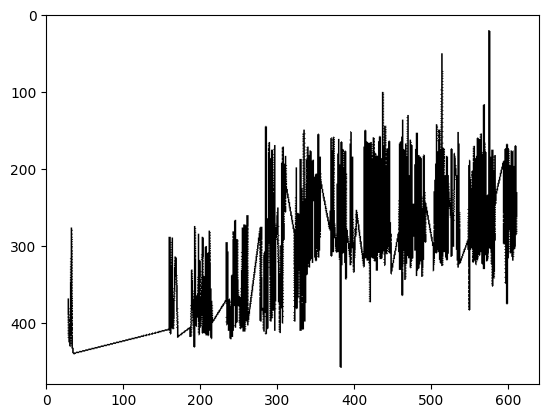

In [ ]:
number = 5
print(labels[number])
img = images[number]
plt.imshow(img.squeeze(0), cmap='gray')

In [ ]:
print(labels)

('variables/', 'variables/', 'variables/', 'variables/', 'variables/', 'variables/', 'variables/', 'nonvariables/', 'variables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'variables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'variables/', 'variables/', 'nonvariables/', 'nonvariables/', 'nonvariables/', 'variables/', 'variables/', 'variables/', 'variables/', 'nonvariables/', 'variables/', 'variables/')
